Introduction :

The goal of this project is to analyzie chronic disease indicators for the US population form years 2001 to 2016. 
According to Centers for Disease Control (CDC), the chronic disease indicators (CDI) are a set of surveillance indicators that nables public health professionals and policymakers to retrieve uniformly defined state and selected metropolitan-level data for chronic diseases and risk factors that have a substantial impact on public health. These indicators are essential for surveillance, prioritization, and evaluation of public health interventions.  

The chronic indicator data is distributed by the state and stratified by gender and ethnicity. 

Owing to the large size of the dataset, we are limiting our analysis for topics such as 'Cancer', 'Cardiovascular Disease', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease' and 'Diabetes'.

We wil be answering the following questions:

1. We are going to try to find the correlation between the chronic disease using indicators such as alcohol use, smoking, high school completion, healthy eating habits, excercise, weight and mental health. For example, is there a correlation between tobacco use an lung cancer?                  
                  
2. We will try to dig into the data to find some race-related insights. Are people belonging to a certain race more hesitant to go for pap-smear (for cervical cancer) and a mammogram (for breast cancer_

3. We will find out which chronic diseases are more prevalent for each of the genders Also, how do lifestyle and habits vary between the gender such as alcohol, tobacco use and excercise. and if it effect the disease prevalenc and mortality rate. 

Let's get started!



In [54]:
import pandas as pd
import numpy as np


In [55]:
import os
os.path.isfile('/Users/Diwan/U.S._Chronic_Disease_Indicators.csv')

True

In [77]:
# loading our data
CDI = pd.read_csv("U.S._Chronic_Disease_Indicators.csv", low_memory=False)


In [87]:
#deleting columns with null values and only selecting columns that we need for analysis
cols = ['State', 'Chronic Disease', 'Indicator', 'DataValueUnit', 'DataValueType', 'DataValueAlt','StratificationCategory1', 'Stratification1' ]
CDI = CDI[cols]
CDI = CDI.dropna(axis = 0)

#dropping overall stratification category to make our data gender specific
CDI.drop(CDI.loc[CDI['StratificationCategory1']== 'Overall'].index, inplace=True)

In [88]:
# examining the rows of data are grouped into the following chronic diseases 
CDI['Chronic Disease'].unique().tolist()
CDI.describe()


,DataValueAlt
count,452882.000000
mean,57.473802
std,94.695083
min,0.000000
25%,15.100000
50%,35.600000
75%,64.500000
max,1845.400000


One interesting thing to note in this dataset is that when we group the data by chronic diseases, it seems like certain indicators are only associated with a specific chronic condition.

Another interesting thing to note is that Data Value Unit and Data Value type are also specific to certain indicators.

In [89]:
CDI.isnull().sum()

State                      0
Chronic Disease            0
Indicator                  0
DataValueUnit              0
DataValueType              0
DataValueAlt               0
StratificationCategory1    0
Stratification1            0
dtype: int64

In [90]:
CDI = CDI.dropna()
CDI

,State,Chronic Disease,Indicator,DataValueUnit,DataValueType,DataValueAlt,StratificationCategory1,Stratification1
0,United States,Overarching Conditions,Life expectancy at age 65 years,Years,Number,17.7,Gender,Male
2,Pennsylvania,Overarching Conditions,Life expectancy at age 65 years,Years,Number,17.4,Gender,Male
3,Florida,Overarching Conditions,Life expectancy at age 65 years,Years,Number,21.7,Gender,Female
4,New Jersey,Overarching Conditions,Life expectancy at birth,Years,Number,82.5,Gender,Female
5,Louisiana,Overarching Conditions,Life expectancy at age 65 years,Years,Number,19.0,Gender,Female
...,...,...,...,...,...,...,...,...
956633,Wisconsin,Tobacco,Quit attempts in the past year among current s...,%,Crude Prevalence,58.2,Gender,Male
956634,Oklahoma,Tobacco,Quit attempts in the past year among current s...,%,Crude Prevalence,81.3,Race/Ethnicity,"Black, non-Hispanic"
956635,Kansas,Tobacco,Quit attempts in the past year among current s...,%,Crude Prevalence,75.8,Race/Ethnicity,"Black, non-Hispanic"
956636,Texas,Tobacco,Quit attempts in the past year among current s...,%,Crude Prevalence,45.6,Race/Ethnicity,"White, non-Hispanic"


Lets try to understand our data a bit. DataValue, DataValue Unit and DataValueType are related. The DataValueUnit tells us whether the data value is a number of years, per 10000 or a percentage. The DataValue type explains the type of data that we have: Is it prevalence, number of deaths, mean or a rate.  

In [91]:
# grouping the data by chronic diseases to find relationship between indicators and a specific disease
CDI_grouped= CDI.groupby('Chronic Disease')
CDI_grouped.head()

,State,Chronic Disease,Indicator,DataValueUnit,DataValueType,DataValueAlt,StratificationCategory1,Stratification1
0,United States,Overarching Conditions,Life expectancy at age 65 years,Years,Number,17.7,Gender,Male
2,Pennsylvania,Overarching Conditions,Life expectancy at age 65 years,Years,Number,17.4,Gender,Male
3,Florida,Overarching Conditions,Life expectancy at age 65 years,Years,Number,21.7,Gender,Female
4,New Jersey,Overarching Conditions,Life expectancy at birth,Years,Number,82.5,Gender,Female
5,Louisiana,Overarching Conditions,Life expectancy at age 65 years,Years,Number,19.0,Gender,Female
...,...,...,...,...,...,...,...,...
113695,Nebraska,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,2.0,Gender,Female
113701,Michigan,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Age-adjusted Rate,3.0,Race/Ethnicity,"Black, non-Hispanic"
113702,Michigan,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,4.2,Gender,Male
125867,New Mexico,Oral Health,Dental visits among children and adolescents a...,%,Crude Prevalence,81.5,Gender,Female


In [92]:
CD_state = CDI.pivot_table(values='DataValueAlt',index=['Chronic Disease','Indicator','DataValueType', 'DataValueUnit'], columns='State',aggfunc='mean',dropna=True).round(2)
CD_state

State                                                                                                     Alabama  \
Chronic Disease Indicator                                          DataValueType           DataValueUnit            
Alcohol         Alcohol use among youth                            Crude Prevalence        %                32.26   
                Alcohol use before pregnancy                       Crude Prevalence        %                43.01   
                Binge drinking frequency among adults aged >= 1... Age-adjusted Mean       Number            4.21   
                                                                   Mean                    Number            4.14   
                Binge drinking intensity among adults aged >= 1... Age-adjusted Mean       Number            6.71   
...                                                                                                           ...   
Tobacco         Pneumococcal vaccination among noninstitutional... Crude Prevalence        %                25.91   
                Pneumococcal vaccination among noninstitutional... Age-adjusted Prevalence %                66.15   
                                                                   Crude Prevalence        %                64.48   
                Quit attempts in the past year among current sm... Age-adjusted Prevalence %                65.08   
                                                                   Crude Prevalence        %                65.56   

State                                                                                                     Alaska  \
Chronic Disease Indicator                                          DataValueType           DataValueUnit           
Alcohol         Alcohol use among youth                            Crude Prevalence        %               23.41   
                Alcohol use before pregnancy                       Crude Prevalence        %               52.68   
                Binge drinking frequency among adults aged >= 1... Age-adjusted Mean       Number           4.68   
                                                                   Mean                    Number           4.34   
                Binge drinking intensity among adults aged >= 1... Age-adjusted Mean       Number           7.32   
...                                                                                                          ...   
Tobacco         Pneumococcal vaccination among noninstitutional... Crude Prevalence        %               26.26   
                Pneumococcal vaccination among noninstitutional... Age-adjusted Prevalence %               55.35   
                                                                   Crude Prevalence        %               51.11   
                Quit attempts in the past year among current sm... Age-adjusted Prevalence %               59.38   
                                                                   Crude Prevalence        %               61.03   

State                                                                                                     Arizona  \
Chronic Disease Indicator                                          DataValueType           DataValueUnit            
Alcohol         Alcohol use among youth                            Crude Prevalence        %                34.90   
                Alcohol use before pregnancy                       Crude Prevalence        %                  NaN   
                Binge drinking frequency among adults aged >= 1... Age-adjusted Mean       Number            4.45   
                                                                   Mean                    Number            4.25   
                Binge drinking intensity among adults aged >= 1... Age-adjusted Mean       Number            7.00   
...                                                                                                           ...   
Tobacco         Pneumococcal vacc

Lets explore cancer in more detail

In [95]:
#selecting cancer disease data
cancer = CDI_grouped.get_group('Cancer')
cancer

,State,Chronic Disease,Indicator,DataValueUnit,DataValueType,DataValueAlt,StratificationCategory1,Stratification1
110928,Minnesota,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,1.6,Gender,Female
113491,Florida,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,5.1,Gender,Male
113695,Nebraska,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,2.0,Gender,Female
113701,Michigan,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Age-adjusted Rate,3.0,Race/Ethnicity,"Black, non-Hispanic"
113702,Michigan,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,4.2,Gender,Male
...,...,...,...,...,...,...,...,...
860697,Utah,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,71.1,Gender,Female
860709,Rhode Island,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted Prevalence,73.6,Gender,Male
860730,Ohio,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,63.2,Race/Ethnicity,Hispanic
860741,South Dakota,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,54.6,Race/Ethnicity,"Other, non-Hispanic"


In [96]:
# calculating mean statistics for cardiovascular disease
cancer.groupby(["Indicator", "DataValueType", "DataValueUnit"]).mean().round(2)


DataValueAlt
Indicator                                          DataValueType                    DataValueUnit              
Cancer of the colon and rectum (colorectal), in... Average Annual Age-adjusted Rate per 100,000           39.46
                                                   Average Annual Crude Rate        per 100,000           35.65
Cancer of the colon and rectum (colorectal), mo... Average Annual Age-adjusted Rate per 100,000           14.41
                                                   Average Annual Crude Rate        per 100,000           13.72
Cancer of the female breast, mortality             Average Annual Age-adjusted Rate per 100,000           19.03
                                                   Average Annual Crude Rate        per 100,000           20.21
Cancer of the female cervix, mortality             Average Annual Age-adjusted Rate per 100,000            2.44
                                                   Average Annual Crude Rate        per 100,000            2.51
Cancer of the lung and bronchus, incidence         Average Annual Age-adjusted Rate per 100,000           54.73
                                                   Average Annual Crude Rate        per 100,000           51.71
Cancer of the lung and bronchus, mortality         Average Annual Age-adjusted Rate per 100,000           38.57
                                                   Average Annual Crude Rate        per 100,000           37.18
Cancer of the oral cavity and pharynx, mortality   Average Annual Age-adjusted Rate per 100,000            2.51
                                                   Average Annual Crude Rate        per 100,000            2.74
Cancer of the prostate, mortality                  Average Annual Age-adjusted Rate per 100,000           21.95
                                                   Average Annual Crude Rate        per 100,000           15.88
Fecal occult blood test, sigmoidoscopy, or colo... Age-adjusted Prevalence          %                     63.10
                                                   Crude Prevalence                 %                     63.16
Invasive cancer (all sites combined), incidence    Average Annual Age-adjusted Rate per 100,000          429.92
                                                   Average Annual Crude Rate        per 100,000          369.28
Invasive cancer (all sites combined), mortality    Average Annual Age-adjusted Rate per 100,000          145.18
                                                   Average Annual Crude Rate        per 100,000          132.90
Invasive cancer of the cervix, incidence           Average Annual Age-adjusted Rate per 100,000            8.01
                                                   Average Annual Crude Rate        per 100,000            7.44
Invasive cancer of the female breast, incidence    Average Annual Age-adjusted Rate per 100,000          125.88
                                                   Average Annual Crude Rate        per 100,000          104.16
Invasive cancer of the oral cavity or pharynx, ... Average Annual Age-adjusted Rate per 100,000           10.76
                                                   Average Annual Crude Rate        per 100,000           10.99
Invasive cancer of the prostate, incidence         Average Annual Age-adjusted Rate per 100,000          105.94
                                                   Average Annual Crude Rate        per 100,000           91.68
Invasive melanoma, incidence                       Average Annual Age-adjusted Rate per 100,000           25.58
                                                   Average Annual Crude Rate        per 100,000           17.48
Mammography use among women aged 50-74 years       Age-adjusted Prevalence          %                     77.63
                                                   Crude Prevalence                 %                     77.82
Melanoma, mortality                                Average Annual A

We can see from the chronic indicators that there are different types of cancer present in the population: colorectal, breast, lung and bronchus, prostate, cervix, and oral cavity and pharynx.

Lets also try to understand thae Data Valye Types.

Incidence is a measure of disease that allows us to determine a person's probability of being diagnosed with a disease during a given period of time. 

Prevalence is a measure of disease that allows us to determine a person's likelihood of having a disease.

Mortality is another term for death. A mortality rate is the number of deaths due to a disease divided by the total population, and is usually expressed as the nmber of deaths per 100,000.

Invasive cancer is one that has moved out into nearby tissue. Lets try to find a correlation between mammography and breast cancer mortality to understand if taking a mammogram allows management of breast cancer, preventing death. 

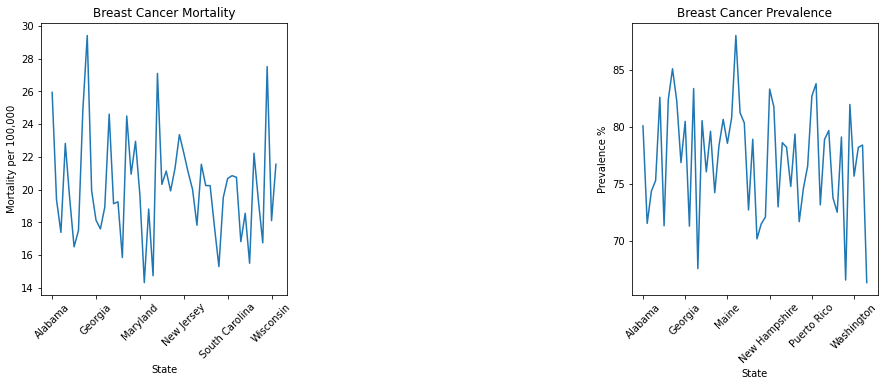

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

Breast_Cancer_Mortality = CDI[CDI['Indicator'] == 'Cancer of the female breast, mortality']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
by_state = Breast_Cancer_Mortality.groupby('State').mean()
by_state['DataValueAlt'].plot.line()
plt.xticks(rotation=45)
plt.title('Breast Cancer Mortality')
plt.ylabel('Mortality')
plt.xlabel('State')

Mammography_Prevalence = CDI[CDI['Indicator'] == 'Mammography use among women aged 50-74 years']
plt.subplot(1, 3, 3)
by_state2 = Mammography_Prevalence.groupby('State').mean()
by_state2['DataValueAlt'].plot.line()
plt.xticks(rotation=45)

plt.title('Breast Cancer Prevalence')
plt.ylabel('Prevalence')
plt.xlabel('State')

plt.show()

We can see that certain states have a higher mortality rate than others, and higher prevalence for cancer. This could be due various reasons such as race variations in the population and socio-economic conditions. Next step would be to compare similar states and dig into the demographic characteristics.